<a href="https://colab.research.google.com/github/mlaricobar/solution-datathon-interbank-2020/blob/desarrollo/%5B02%5D%20EDA%20-%20Datasets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploratory Data Analysis

## Config

### Installations 

In [1]:
!pip install --upgrade confuse
!pip install --upgrade htmlmin
!pip install --upgrade phik
!pip install --upgrade tangled-up-in-unicode
!pip install --upgrade tqdm
!pip install --upgrade --force-reinstall visions==0.5.0
!pip install --upgrade imagehash
!pip install --upgrade --force-reinstall --no-deps pandas-profiling

Requirement already up-to-date: confuse in /usr/local/lib/python3.6/dist-packages (1.4.0)
Requirement already up-to-date: htmlmin in /usr/local/lib/python3.6/dist-packages (0.1.12)
Requirement already up-to-date: phik in /usr/local/lib/python3.6/dist-packages (0.10.0)
Requirement already up-to-date: tangled-up-in-unicode in /usr/local/lib/python3.6/dist-packages (0.0.6)
Requirement already up-to-date: tqdm in /usr/local/lib/python3.6/dist-packages (4.54.1)
  Using cached https://files.pythonhosted.org/packages/26/e3/9416e94e767d59a86edcbcb8e1c8f42874d272c3b343676074879e9db0e0/visions-0.5.0-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/4a/e2/e588ab9298d4989ce7fdb2b97d18aac878d99dbdc379a4476a09d9271b68/tangled_up_in_unicode-0.0.6-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/c3/aa/cb45262569fcc047bf070b5de61813724d6726db83259222cd7b4c79821a/attrs-20.3.0-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/9b/cd/dc

Requirement already up-to-date: imagehash in /usr/local/lib/python3.6/dist-packages (4.2.0)
  Using cached https://files.pythonhosted.org/packages/32/79/5d03ed1172e3e67a997a6a795bcdd2ab58f84851969d01a91455383795b6/pandas_profiling-2.9.0-py2.py3-none-any.whl
  Found existing installation: pandas-profiling 2.9.0
    Uninstalling pandas-profiling-2.9.0:
      Successfully uninstalled pandas-profiling-2.9.0


### Imports 

In [2]:
from google.colab import drive, files

import pandas as pd
from pandas_profiling import ProfileReport

import matplotlib.pyplot as plt

In [3]:
drive.mount('/gdrive')

Mounted at /gdrive


In [4]:
%cd /gdrive/'My Drive'/Competencias/'[02] Interbank-2020'
!ls -lh '[00] Data'

/gdrive/My Drive/Competencias/[02] Interbank-2020
total 5.1G
-rw------- 1 root root 979M Dec 12 01:33 censo_test.csv
-rw------- 1 root root 748M Dec 12 01:34 censo_train.csv
-rw------- 1 root root  998 Dec 12 01:34 productos.csv
-rw------- 1 root root 1.7G Dec 12 01:34 rcc_test.csv
-rw------- 1 root root 1.4G Dec 12 01:35 rcc_train.csv
-rw------- 1 root root 3.3M Dec 12 01:35 sample_submission.csv
-rw------- 1 root root  30M Dec 12 01:35 se_test.csv
-rw------- 1 root root  28M Dec 12 01:35 se_train.csv
-rw------- 1 root root 122M Dec 12 01:35 sunat_test.csv
-rw------- 1 root root 106M Dec 12 01:35 sunat_train.csv
-rw------- 1 root root 3.0M Dec 12 01:35 y_train.csv


In [5]:
def optimizar_df(df):
  
  for col_ in df.select_dtypes(include=[int]).columns:
    df[col_] = pd.to_numeric(df[col_], downcast="unsigned")

  for col_ in df.select_dtypes(include=[float]).columns:
    df[col_] = pd.to_numeric(df[col_], downcast="float")
  
  return df

## Dataset Socio-económica

In [5]:
df_se_train = optimizar_df(pd.read_csv("[00] Data/se_train.csv"))#, index_col="key_value"
df_se_test = optimizar_df(pd.read_csv("[00] Data/se_train.csv"))#, index_col="key_value"

In [6]:
df_se_train.head()

,key_value,edad,sexo,est_cvl,sit_lab,cod_ocu,ctd_hijos,flg_sin_email,ctd_veh,cod_ubi,lgr_vot,prv,dto,rgn,tip_lvledu
0,0,-0.983651,1,4,2,22,0.0,1,0.0,-0.070167,17,47,687,4,0
1,1,0.000953,1,4,1,22,0.0,1,1.0,-0.738566,10,186,849,6,0
2,2,0.531124,0,4,1,22,0.0,1,0.0,-0.297248,15,84,1405,1,7
3,3,-1.135129,0,4,1,22,0.0,1,0.0,-1.203435,4,9,977,6,7
4,4,-1.438084,0,4,1,22,0.0,1,0.0,0.043424,18,111,391,3,0


In [7]:
df_se_train.shape[0]

358428

In [11]:
pfe_se_train = ProfileReport(df_se_train, explorative=True)
pfe_se_test = ProfileReport(df_se_test, explorative=True)

In [12]:
pfe_se_train.to_file("pfe_se_train.html")

In [17]:
pfe_se_test.to_file("pfe_se_test.html")

In [7]:
#files.download('pfe_se_train.html')
#files.download('pfe_se_test.html')

## Target

In [6]:
df_y_train = optimizar_df(pd.read_csv("[00] Data/y_train.csv"))#, index_col="key_value"

In [7]:
df_y_train.head()

,key_value,target
0,0,0
1,1,0
2,2,0
3,3,0
4,4,1


In [8]:
df_y_train["target"].mean()

0.15819262623191357

In [9]:
df_y_train.shape[0]

358487

In [37]:
df_se_train = df_se_train.merge(df_y_train, how="left", on="key_value")

In [38]:
df_se_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 358428 entries, 0 to 358427
Data columns (total 16 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   key_value      358428 non-null  int64  
 1   edad           354663 non-null  float64
 2   sexo           358428 non-null  int64  
 3   est_cvl        358428 non-null  int64  
 4   sit_lab        358428 non-null  int64  
 5   cod_ocu        358428 non-null  int64  
 6   ctd_hijos      358428 non-null  float64
 7   flg_sin_email  358428 non-null  int64  
 8   ctd_veh        358428 non-null  float64
 9   cod_ubi        354255 non-null  float64
 10  lgr_vot        358428 non-null  int64  
 11  prv            358428 non-null  int64  
 12  dto            358428 non-null  int64  
 13  rgn            358428 non-null  int64  
 14  tip_lvledu     358428 non-null  int64  
 15  target         358428 non-null  int64  
dtypes: float64(4), int64(12)
memory usage: 46.5 MB


In [15]:
df_y_train.loc[df_y_train["key_value"] == 4335].head()

,key_value,target
4335,4335,0


## Dataset RCC

In [12]:
df_rcc_train = optimizar_df(pd.read_csv("[00] Data/rcc_train.csv"))
df_rcc_test = optimizar_df(pd.read_csv("[00] Data/rcc_test.csv"))

In [13]:
df_rcc_train.head()

,codmes,key_value,condicion,tipo_credito,cod_instit_financiera,saldo,PRODUCTO,RIESGO_DIRECTO,COD_CLASIFICACION_DEUDOR
0,201711,4,0,12,33,-0.072601,6,-1,0
1,201711,4,0,12,33,-0.070608,7,-1,0
2,201711,4,0,12,61,-0.052054,5,-1,0
3,201711,4,0,11,32,-0.072456,8,1,0
4,201711,4,0,12,61,-0.057877,0,1,0


In [17]:
def plot_cat_features_per_month(df_all, cat_col):
  df_agg = df_all.groupby(["codmes", cat_col]).agg({"condicion": "count"}).sort_values(by=["codmes", "condicion"], ascending=[True, False])
  cat_list = df_agg.reset_index(drop=False).groupby(cat_col, as_index=False).agg({"condicion": "sum"}).sort_values(by=["condicion"], ascending=[False])[cat_col].tolist()
  table = df_agg.unstack().fillna(0)
  table.columns = [t[-1] for t in df_agg.unstack().columns.values]
  table = table[cat_list]
  g = table.div(table.sum(axis=1).astype(float), axis=0).plot(kind='bar', stacked=True, figsize=(15,7))
  plt.title('Codmes vs {0}'.format(cat_col))
  plt.xlabel('Codmes') 
  plt.ylabel('Proporción de {0}'.format(cat_col))
  plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

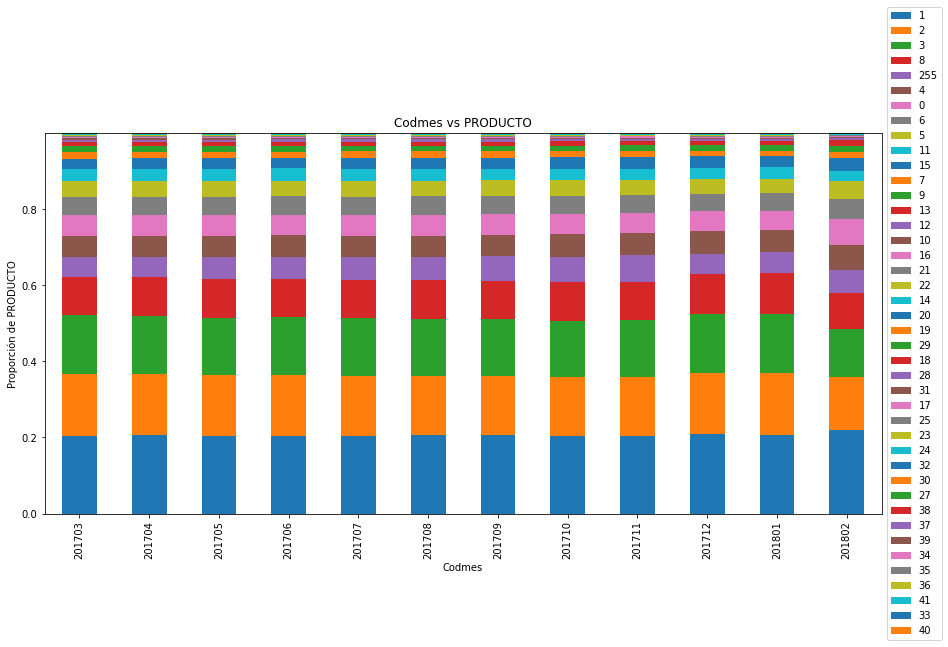

In [19]:
#plot_cat_features_per_month(df_rcc_train, "cod_instit_financiera")
#plot_cat_features_per_month(df_rcc_train, "PRODUCTO")
#plot_cat_features_per_month(df_rcc_train, "RIESGO_DIRECTO")
#plot_cat_features_per_month(df_rcc_train, "COD_CLASIFICACION_DEUDOR")
#plot_cat_features_per_month(df_rcc_train, "condicion_cat")
plot_cat_features_per_month(df_rcc_train, "PRODUCTO")

In [26]:
top_freq_products = [1, 2, 3, 8, 255, 4, 0, 6]
top_propensity_products = [12, 17, 18, 25, 20]
low_propensity_products = [32, 33, 35, 36, 37, 38, 40, 41]
list_product = top_freq_products + top_propensity_products + low_propensity_products
print(list_product)

[1, 2, 3, 8, 255, 4, 0, 6, 12, 17, 18, 25, 20, 32, 33, 35, 36, 37, 38, 40, 41]


In [38]:
df_rcc_train["new_PRODUCTO"] = df_rcc_train["PRODUCTO"]
df_rcc_train.loc[df_rcc_train["PRODUCTO"].isin(top_propensity_products), "new_PRODUCTO"] = "TOP_PROPENSITY"
df_rcc_train.loc[df_rcc_train["PRODUCTO"].isin(low_propensity_products), "new_PRODUCTO"] = "LOW_PROPENSITY"
df_rcc_train.loc[~df_rcc_train["PRODUCTO"].isin(list_product), "new_PRODUCTO"] = "OTROS"

In [46]:
df_rcc_test["new_PRODUCTO"] = df_rcc_test["PRODUCTO"]
df_rcc_test.loc[df_rcc_test["PRODUCTO"].isin(top_propensity_products), "new_PRODUCTO"] = "TOP_PROPENSITY"
df_rcc_test.loc[df_rcc_test["PRODUCTO"].isin(low_propensity_products), "new_PRODUCTO"] = "LOW_PROPENSITY"
df_rcc_test.loc[~df_rcc_test["PRODUCTO"].isin(list_product), "new_PRODUCTO"] = "OTROS"

In [39]:
df_rcc_train_1 = df_rcc_train.merge(df_y_train, how="left", on="key_value")

In [44]:
#df_rcc_train_1.groupby("codmes", as_index=False).agg({"target": "mean"}).sort_values(by="target", ascending=False)
df_rcc_train_1.groupby("new_PRODUCTO", as_index=False).agg({"target": ["mean", "count"]}).sort_values(by=("target", "mean"), ascending=False)

new_PRODUCTO    target         
                        mean    count
10  TOP_PROPENSITY  0.802512   232693
5                6  0.224332  1464031
4                4  0.195240  1750596
0                0  0.191279  1681760
9            OTROS  0.172569  4801030
1                1  0.153146  6286680
6                8  0.132459  3069968
7              255  0.129681  1813077
2                2  0.118798  4755886
3                3  0.112642  4535051
8   LOW_PROPENSITY  0.000000      854

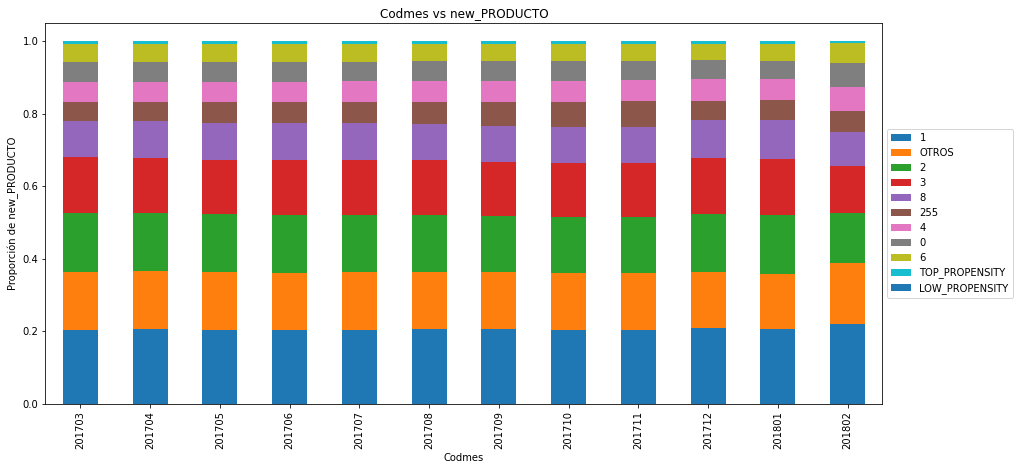

In [45]:
plot_cat_features_per_month(df_rcc_train_1, "new_PRODUCTO")

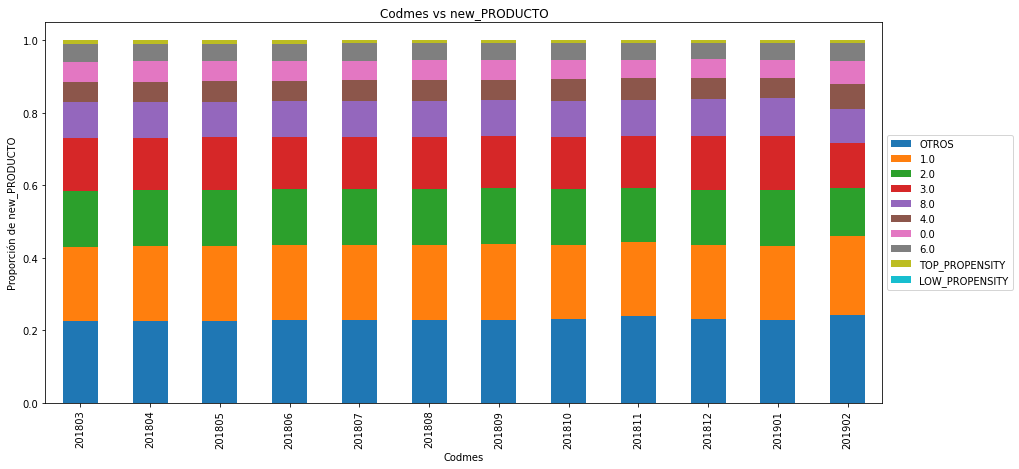

In [47]:
plot_cat_features_per_month(df_rcc_test, "new_PRODUCTO")

In [50]:
df_rcc_train.loc[df_rcc_train["PRODUCTO"] == 255]

,codmes,key_value,condicion,tipo_credito,cod_instit_financiera,saldo,PRODUCTO,RIESGO_DIRECTO,COD_CLASIFICACION_DEUDOR,new_PRODUCTO
12,201711,5,0,9,38,-0.072859,255,-1,0,255
15,201711,5,0,12,15,-0.072825,255,-1,0,255
32,201711,12,0,11,11,-0.072814,255,-1,0,255
74,201711,42,0,11,10,-0.072825,255,-1,0,255
79,201711,43,0,10,28,-0.072859,255,-1,0,255
...,...,...,...,...,...,...,...,...,...,...
30391584,201801,258755,0,13,1,0.322775,255,-1,0,255
30391587,201801,312963,0,11,0,-0.072232,255,-1,0,255
30391603,201801,258758,0,12,15,-0.072579,255,-1,0,255
30391611,201801,324411,0,12,1,-0.072814,255,-1,0,255


In [51]:
[c for c in df_rcc_train["PRODUCTO"].unique().tolist() if c not in df_rcc_test["PRODUCTO"].unique().tolist()]

[255]

### Feature **Condición**

In [64]:
df_rcc_train["condicion_cat"] = df_rcc_train["condicion"].apply(lambda c: 0 if c == 0 else "00_03" if c < 90 else  "03_06" if c < 180 else "06_12" if c < 365 else "12-32" if c < 960 else ">32")

In [65]:
df_rcc_train.groupby(["codmes", "condicion_cat"], as_index=False).agg({"key_value": ["count", "nunique"], "condicion": ["min", "max"]}).sort_values(by="codmes", ascending=False)

codmes condicion_cat key_value         condicion      
                             count nunique       min   max
71  201802           >32     13813   10386       960  9999
70  201802         12-32      6057    4492       365   959
69  201802         06_12      3755    2686       180   364
68  201802         03_06      4460    2340        90   179
67  201802         00_03     67490   24181         1    89
..     ...           ...       ...     ...       ...   ...
2   201703         03_06      2785    1843        90   179
1   201703         00_03     60389   22564         1    89
4   201703         12-32      7234    5233       365   959
5   201703           >32     13674   10582       960  9999
0   201703             0   2211888  266216         0     0

[72 rows x 6 columns]

In [ ]:
df_rcc_train.loc[df_rcc_train["condicion"] == 9999]

In [ ]:
df_se_train.loc[df_se_train["key_value"] == 319538]

### Feature **Producto**

In [59]:
df_rcc_train_agg = df_rcc_train.groupby(["codmes", "key_value"], as_index=False).agg({"PRODUCTO": "count"})

In [61]:
df_rcc_train_agg.groupby("codmes", as_index=False).agg({"PRODUCTO": ["min", "mean", "max"]})

codmes PRODUCTO              
                min      mean max
0   201703        1  8.478538  72
1   201704        1  8.544050  64
2   201705        1  8.534149  68
3   201706        1  8.601406  69
4   201707        1  8.596254  66
5   201708        1  8.617329  64
6   201709        1  8.718542  66
7   201710        1  8.682221  62
8   201711        1  8.718877  62
9   201712        1  8.644327  66
10  201801        1  8.827767  67
11  201802        1  9.069171  65

In [19]:
df_rcc_train.groupby("codmes", as_index=False).agg({"key_value": ["count", "nunique"]}).sort_values(by="codmes", ascending=False)

codmes key_value        
               count nunique
11  201802   3251180  358487
10  201801   2599133  294427
9   201712   2549039  294880
8   201711   2582235  296166
7   201710   2551045  293824
6   201709   2524942  289606
5   201708   2475888  287315
4   201707   2444190  284332
3   201706   2407525  279899
2   201705   2365299  277157
1   201704   2341813  274087
0   201703   2299337  271195

In [22]:
df_rcc_test.groupby("codmes", as_index=False).agg({"key_value": ["count", "nunique"]}).sort_values(by="codmes", ascending=False)

codmes key_value        
               count nunique
11  201902   3668504  396666
10  201901   2974453  326447
9   201812   2913266  327683
8   201811   2927965  329841
7   201810   2873164  327975
6   201809   2850795  323546
5   201808   2803200  321742
4   201807   2760481  319240
3   201806   2725859  314598
2   201805   2671249  311221
1   201804   2610643  307786
0   201803   2572175  304407

In [ ]:
df_rcc_all = pd.concat([df_rcc_train, df_rcc_test]).reset_index(drop=True)

In [ ]:
df_rcc_all.

Lista de Cambios:

*   Quitar a los registros con código de producto 255
*   Sumar 1 a los valores de la variable saldo

